In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/219?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 5599
Some examples: [('蛤蜊', '九層塔'), ('蛤蜊', '蒜頭'), ('蛤蜊', '烏醋'), ('蛤蜊', '水'), ('蛤蜊', '沙拉油'), ('九層塔', '蒜頭')]


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.2rc2_1932.g75a35ef-py3.4-linux-x86_64.egg/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


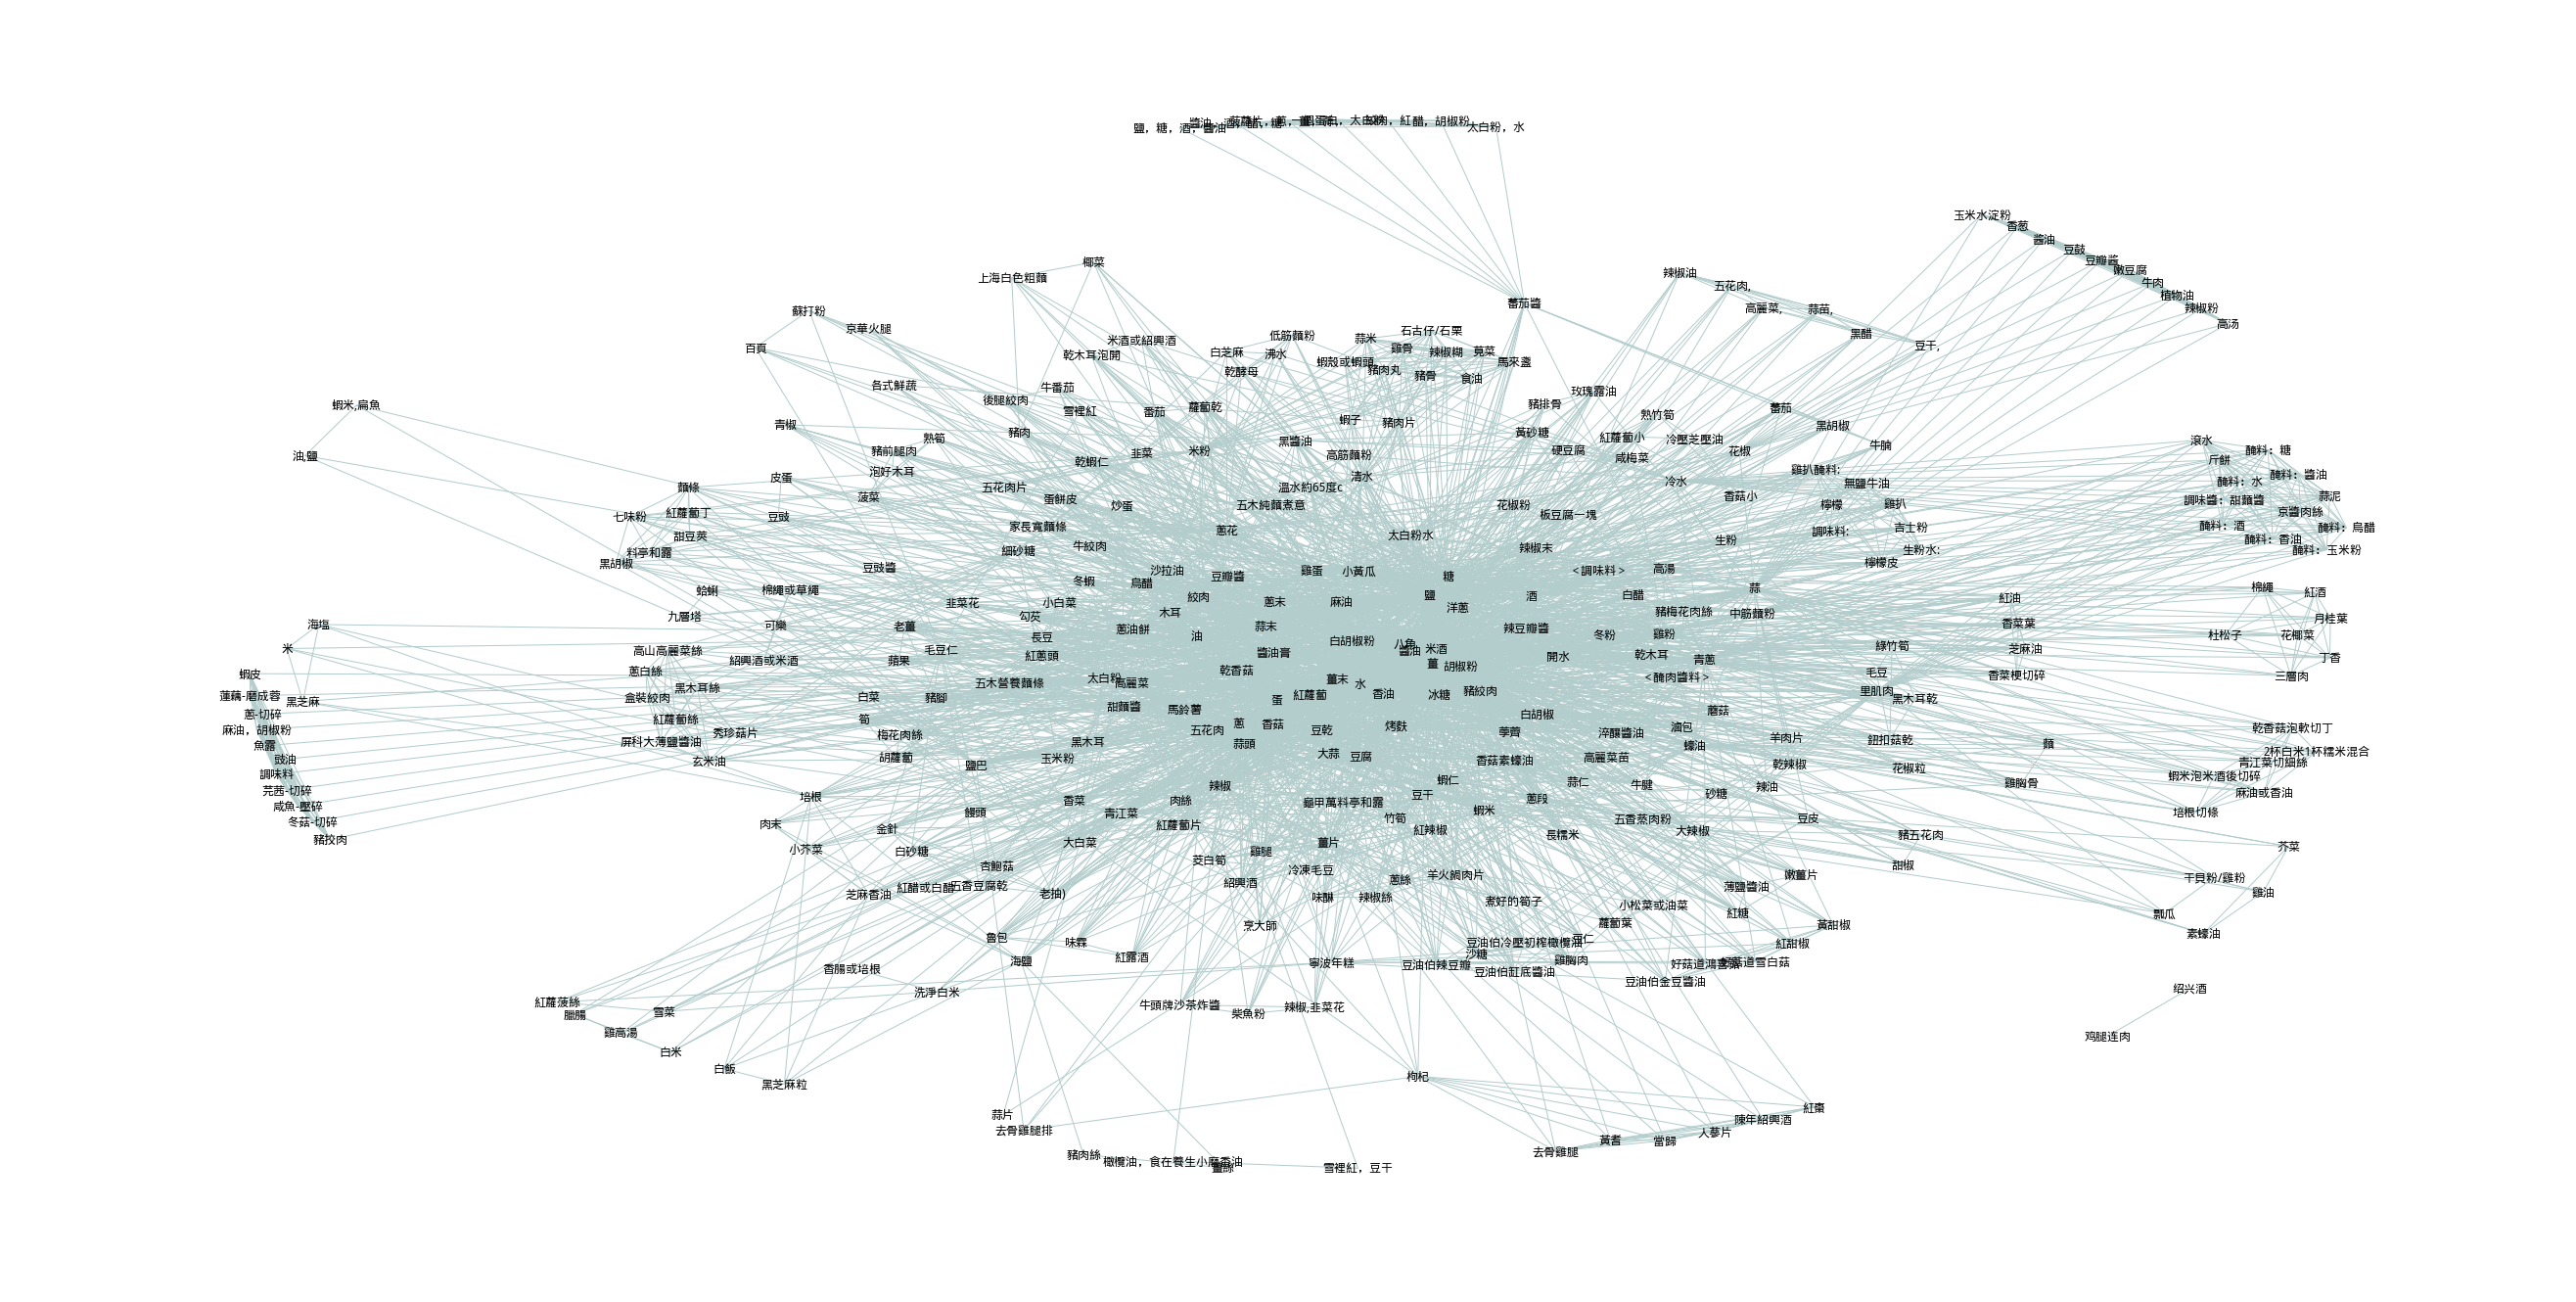

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('china_recipe.png', dpi=100)

In [3]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('醬油', 185), ('鹽', 180), ('水', 151), ('糖', 146), ('米酒', 125), ('香油', 105), ('紅蘿蔔', 97), ('蒜末', 90), ('蔥', 87), ('薑末', 87), ('蒜頭', 86), ('青蔥', 81), ('豬絞肉', 81), ('胡椒粉', 77), ('乾香菇', 73)]

Closeness centrality: [('醬油', 0.6692082668891447), ('鹽', 0.6580133330564266), ('糖', 0.6232591077189393), ('水', 0.615671605538013), ('米酒', 0.5870832059442082), ('香油', 0.5728336135669216), ('蒜末', 0.5566213414848389), ('紅蘿蔔', 0.5566213414848389), ('薑末', 0.5557475246222253), ('豬絞肉', 0.5522795213484517), ('青蔥', 0.551419272872831), ('蔥', 0.5497067906589403), ('薑', 0.5488545320687714), ('蒜頭', 0.5488545320687714), ('乾香菇', 0.542961922061898)]

Degree centrality: [('醬油', 0.5167597765363129), ('鹽', 0.5027932960893855), ('水', 0.42178770949720673), ('糖', 0.40782122905027934), ('米酒', 0.34916201117318435), ('香油', 0.29329608938547486), ('紅蘿蔔', 0.2709497206703911), ('蒜末', 0.25139664804469275), ('蔥', 0.24301675977653633), ('薑末', 0.24301675977653633), ('蒜頭', 0.24022346368715083), ('青蔥', 0.22625698324022347), ('豬

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 64261.0
Total edges in the graph: 3622
Density: 0.0564

Name: 
Type: Graph
Number of nodes: 359
Number of edges: 3622
Average degree:  20.1783


In [8]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 3859
[(('醬油', '糖'), 19), (('醬油', '香油'), 18), (('醬油', '米酒'), 15), (('鹽', '糖'), 13), (('薑末', '醬油'), 12), (('醬油', '鹽'), 12), (('醬油', '水'), 11), (('蔥', '醬油'), 11), (('蒜末', '醬油'), 11), (('鹽', '水'), 11), (('豬絞肉', '醬油'), 11), (('薑', '醬油'), 10), (('青蔥', '醬油'), 10), (('薑末', '米酒'), 10), (('薑末', '糖'), 9)]


In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

185


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.463
